In [1]:
%cd "C:\Users\veena\Documents\NH Hackthon\News _dataset"

C:\Users\veena\Documents\NH Hackthon\News _dataset


In [3]:
Fake_data = pd.read_csv("Fake.csv")
True_data = pd.read_csv("True.csv")
Fake_data["category_numeric"] = 1
True_data["category_numeric"] = 0

full_data = pd.concat([Fake_data,True_data], axis =0)

X = full_data[[ 'text']]
y = full_data['category_numeric']

In [5]:
from sklearn.preprocessing import LabelEncoder
#one hot encoding

le = LabelEncoder()
Y = le.fit_transform(y)
Y = Y.reshape(-1,1)

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [27]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train.text)
sequences = tok.texts_to_sequences(X_train.text)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [39]:
from keras.callbacks import EarlyStopping
%matplotlib inline

def LSTMKerasModel():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model


model = LSTMKerasModel()

model.summary()

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005),metrics=['accuracy'])

history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_17 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

C:\Users\veena\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 28734 samples, validate on 7184 samples
Epoch 1/10
28734/28734 [==============================] - 68s 2ms/step - loss: 0.6651 - accuracy: 0.7953 - val_loss: 0.5649 - val_accuracy: 0.8494
Epoch 2/10
28734/28734 [==============================] - 72s 2ms/step - loss: 0.2870 - accuracy: 0.9090 - val_loss: 0.1504 - val_accuracy: 0.9479
Epoch 3/10
28734/28734 [==============================] - 73s 3ms/step - loss: 0.1201 - accuracy: 0.9628 - val_loss: 0.1043 - val_accuracy: 0.9666
Epoch 4/10
28734/28734 [==============================] - 73s 3ms/step - loss: 0.0895 - accuracy: 0.9719 - val_loss: 0.0872 - val_accuracy: 0.9713
Epoch 5/10
28734/28734 [==============================] - 73s 3ms/step - loss: 0.0732 - accuracy: 0.9776 - val_loss: 0.0787 - val_accuracy: 0.9740
Epoch 6/10
28734/28734 [==============================] - 73s 3ms/step - loss: 0.0618 - accuracy: 0.9818 - val_loss: 0.0698 - val_accuracy: 0.9777
Epoch 7/10
28734/28734 [==============================] - 73s 3ms/ste

In [40]:
test_seq = tokenize__.texts_to_sequences(X_test.text)
test_seq_matrix = sequence.pad_sequences(test_seq,maxlen=max_len)

accr = model.evaluate(test_seq_matrix,Y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


8980/8980 [==============================] - 8s 925us/step
Test set
  Loss: 0.738
  Accuracy: 0.747


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


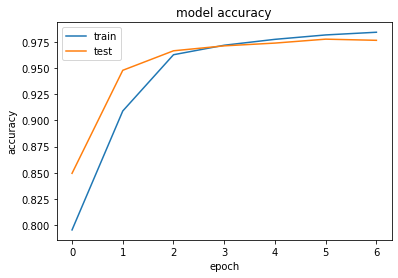

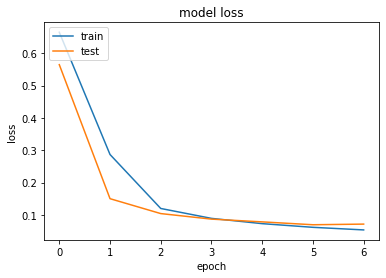

In [42]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
y_pred =  model.predict(test_seq_matrix)

In [32]:
from sklearn.metrics import classification_report, f1_score
print(classification_report(Y_test , y_pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4316
           1       0.99      0.98      0.98      4664

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



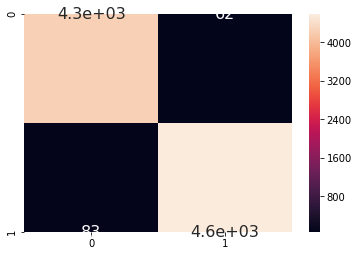

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sn
cm = confusion_matrix(Y_test, y_pred.round())

#plot_confusion_matrix(model, test_sequences_matrix, Y_test)  
#plt.show() 

#sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [34]:
%cd "C:\Users\veena\Documents\NH Hackthon"
current_affair = pd.read_csv("current_affairs_new.csv")

current_train_data = current_affair[['Statement', 'category']]
current_train_data['category_numeric'] = [0 if x =='TRUE' else 1 for x in current_train_data['category']]

current_affair_X = current_train_data[['Statement']]
current_affair_Y = current_train_data.category_numeric

current_affair_Y = le.fit_transform(current_affair_Y)
current_affair_Y = current_affair_Y.reshape(-1,1)
#current_affair_Y = to_categorical(current_affair_Y)

tokenize__.fit_on_texts(current_affair_X.Statement)
current_affair_sequences = tokenize__.texts_to_sequences(current_affair_X.Statement)
current_affair_sequences_matrix = sequence.pad_sequences(current_affair_sequences,maxlen=max_len)

model.fit(current_affair_sequences_matrix,current_affair_Y,batch_size=128,epochs=20,
          validation_split=0,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

C:\Users\veena\Documents\NH Hackthon


C:\Users\veena\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Epoch 1/20
3951/3951 [==============================] - 8s 2ms/step - loss: 0.5364 - accuracy: 0.7970
Epoch 2/20


C:\Users\veena\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


3951/3951 [==============================] - 8s 2ms/step - loss: 0.4927 - accuracy: 0.8087
Epoch 3/20
3951/3951 [==============================] - 9s 2ms/step - loss: 0.4724 - accuracy: 0.8127
Epoch 4/20
3951/3951 [==============================] - 9s 2ms/step - loss: 0.4600 - accuracy: 0.8152
Epoch 5/20
3951/3951 [==============================] - 9s 2ms/step - loss: 0.4538 - accuracy: 0.8175
Epoch 6/20
3951/3951 [==============================] - 9s 2ms/step - loss: 0.4475 - accuracy: 0.8185
Epoch 7/20
3951/3951 [==============================] - 9s 2ms/step - loss: 0.4428 - accuracy: 0.8213
Epoch 8/20
3951/3951 [==============================] - 9s 2ms/step - loss: 0.4370 - accuracy: 0.8231
Epoch 9/20
3951/3951 [==============================] - 9s 2ms/step - loss: 0.4329 - accuracy: 0.8246
Epoch 10/20
3951/3951 [==============================] - 9s 2ms/step - loss: 0.4300 - accuracy: 0.8254
Epoch 11/20
3951/3951 [==============================] - 9s 2ms/step - loss: 0.4248 - accura

In [35]:
current_affair_set2 = pd.read_csv("current_affairs_new_2.csv")
current_affair_set2_data = current_affair_set2[['Statement', 'category']]

current_affair_set2_X = current_affair_set2_data[['Statement']]
current_affair_set2_Y = current_affair_set2_data.category


current_affair_set2_Y = le.fit_transform(current_affair_set2_Y)
current_affair_set2_Y = current_affair_set2_Y.reshape(-1,1)

tokenize__.fit_on_texts(current_affair_set2_X.Statement)
current_affair_sequences_set2 = tokenize__.texts_to_sequences(current_affair_set2_X.Statement)
current_affair_sequences_matrix_set2 = sequence.pad_sequences(current_affair_sequences_set2,maxlen=maximum_len)

model.fit(current_affair_sequences_matrix_set2,current_affair_set2_Y,batch_size=128,epochs=25,
          validation_split=0,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])


Epoch 1/25
15633/15633 [==============================] - 33s 2ms/step - loss: 0.6697 - accuracy: 0.6294
Epoch 2/25
15633/15633 [==============================] - 35s 2ms/step - loss: 0.6326 - accuracy: 0.6492
Epoch 3/25
15633/15633 [==============================] - 36s 2ms/step - loss: 0.6196 - accuracy: 0.6599
Epoch 4/25
15633/15633 [==============================] - 36s 2ms/step - loss: 0.6116 - accuracy: 0.6674
Epoch 5/25
15633/15633 [==============================] - 37s 2ms/step - loss: 0.6047 - accuracy: 0.6737
Epoch 6/25
15633/15633 [==============================] - 37s 2ms/step - loss: 0.6001 - accuracy: 0.6781
Epoch 7/25
15633/15633 [==============================] - 37s 2ms/step - loss: 0.5947 - accuracy: 0.6829
Epoch 8/25
15633/15633 [==============================] - 36s 2ms/step - loss: 0.5909 - accuracy: 0.6873
Epoch 9/25
15633/15633 [==============================] - 36s 2ms/step - loss: 0.5868 - accuracy: 0.6914
Epoch 10/25
15633/15633 [==============================

In [37]:
# serialize model to JSON
model_json = model.to_json()
with open("model_LSTM_Dense_layer_1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_LSTM_Dense_layer_1.h5")
print("Saved model to disk")

Saved model to disk


In [38]:
history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 28734 samples, validate on 7184 samples
Epoch 1/10
28734/28734 [==============================] - 64s 2ms/step - loss: 0.2185 - accuracy: 0.9115 - val_loss: 0.1270 - val_accuracy: 0.9550
Epoch 2/10
28734/28734 [==============================] - 66s 2ms/step - loss: 0.0970 - accuracy: 0.9674 - val_loss: 0.0963 - val_accuracy: 0.9653
Epoch 3/10
28734/28734 [==============================] - 67s 2ms/step - loss: 0.0725 - accuracy: 0.9763 - val_loss: 0.0811 - val_accuracy: 0.9719
Epoch 4/10
15360/28734 [===============>..............] - ETA: 29s - loss: 0.0622 - accuracy: 0.9793

KeyboardInterrupt: 